In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import acquire
import prepare

import matplotlib.pyplot as plt
from env import host, user, password
from pydataset import data
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import MinMaxScaler


Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

In [2]:
# get and prepare titanic data
titanic_df = acquire.new_titanic_data()
titanic_df.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1


In [3]:
# prep and create our train, validate and test dataframes / creates dummies 
# for string catagoricals - already removed what was not needed in prepare.py
train, validate, test = prepare.prep_titanic_data(acquire.get_titanic_data())
train.head(3)

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
474,0,3,0,0,9.8375,1,0,0,1
370,1,1,1,0,55.4417,0,1,0,0
573,1,3,0,0,7.7500,1,0,1,0


1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [4]:
# find the best base case
train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [5]:
# create baseline column with most frequent answer, this is adding column

train['baseline'] = 0

In [6]:
train.head(3)

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,baseline
474,0,3,0,0,9.8375,1,0,0,1,0
370,1,1,1,0,55.4417,0,1,0,0,0
573,1,3,0,0,7.7500,1,0,1,0,0


In [7]:
# baseline accuracy

baseline_accuracy = (train['survived'] == train['baseline']).mean()
print (f'Baseline Accuracy is {baseline_accuracy:.2%}')

Baseline Accuracy is 61.65%


In [8]:
# drop the baseline column

train = train.drop(columns='baseline')

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)¶

In [9]:
# Assign our x and y variables for train and validate datasets
X_cols = ['pclass', 'alone', 'sex_male', 'embark_town_Queenstown', 'embark_town_Southampton']
y_col = 'survived'

X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [10]:
# Create Decision Tree object
model1 = DecisionTreeClassifier(max_depth=2, random_state = 149)

# fit the model to training data
model1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=149)

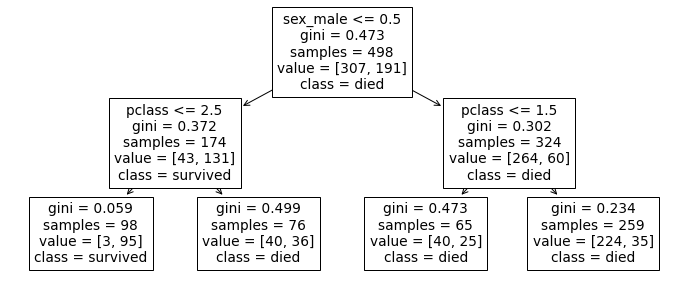

In [11]:
plt.figure(figsize = (12,5))
# interpret + visualize model
plot_tree(model1, feature_names=X_train.columns.tolist(), 
          class_names= ['died', 'survived'])
plt.show()

In [12]:
# make predictions

y_pred = model1.predict(X_train)
y_pred [0:5]

array([0, 0, 0, 0, 0])

In [13]:
yv_pred = model1.predict(X_validate)
yv_pred [0:5]

array([0, 0, 0, 0, 0])

In [14]:
# this is just for reference to see the size of each

train.shape, validate.shape, test.shape

((498, 9), (214, 9), (179, 9))

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.¶

In [15]:
# Accuracy - training split score

print(f'training score: {model1.score(X_train, y_train):.2%}')
print(f'validate score: {model1.score(X_validate, y_validate):.2%}')

training score: 80.12%
validate score: 76.17%


In [16]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_train, y_pred, labels = (0,1)), 
                 index = ['actual died', 'actual survived'],
                columns = ['predicted died', 'predicted survived'])

,predicted died,predicted survived
actual died,304,3
actual survived,96,95


In [17]:
# #onfusion matrix explaination

# print("True Positives", tp)
# print("False Positives", fp)
# print("False Negatives", fn)
# print("True Negatives", tn)

# print("-------------")

# accuracy = (tp + tn) / (tp + tn + fp + fn)
# recall = tp / (tp + fn)
# precision = tp / (tp + fp)

# print("Accuracy is", accuracy)
# print("Recall is", recall)
# print("Precision is", precision)

In [18]:
target_names = ['actual', 'predicted']
print(classification_report(y_train, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      actual       0.76      0.99      0.86       307
   predicted       0.97      0.50      0.66       191

    accuracy                           0.80       498
   macro avg       0.86      0.74      0.76       498
weighted avg       0.84      0.80      0.78       498



4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.¶

In [19]:
# validate split accuracy
vs = (validate.survived == validate.prediction).mean()
vs

AttributeError: 'DataFrame' object has no attribute 'prediction'

In [ ]:
# validate split model score
print(f'validate score: {model1.score(X_validate, y_validate):.2%}')

In [ ]:
yv_pred = model1.predict(X_validate)

In [ ]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_validate, yv_pred, labels = (0,1)), 
                 index = ['actual died', 'actual survived'],
                columns = ['predicted died', 'predicted survived'])

In [ ]:
# classification report of validate dataset
target_names = ['actual', 'predicted']
print(classification_report(y_validate, yv_pred, target_names=target_names))

5. Run through steps 2-4 using a different max_depth value.

In [ ]:
# Create Decision Tree object
model2 = DecisionTreeClassifier(max_depth=3, random_state = 149)

# fit the model to training data
model2.fit(X_train, y_train)

In [ ]:
plt.figure(figsize = (14,8))
# interpret + visualize model
plot_tree(model2, feature_names=X_train.columns.tolist(), 
          class_names= ['died', 'survived'],filled=True, rounded=True)
plt.show()

In [ ]:
# training split score
print(f'training score: {model2.score(X_train, y_train):.2%}')

In [ ]:
# validate split model score
print(f'validate score: {model2.score(X_validate, y_validate):.2%}')

In [ ]:
y_pred2 = model2.predict(X_train)
y_pred2

In [ ]:
yv_pred2 = model2.predict(X_validate)
yv_pred2

In [ ]:
# Confusion matrix with predictions using train
pd.DataFrame(confusion_matrix(y_train, y_pred2, labels=(0, 1)),
             index=['acutal died', 'actual survived'], columns=['predicted died', 'predicted survived'])

In [ ]:
# Confusion matrix with predictions using validate
pd.DataFrame(confusion_matrix(y_validate, yv_pred2, labels=(0, 1)),
             index=['acutal died', 'actual survived'], columns=['predicted died', 'predicted survived'])

In [ ]:
# classification report of train dataset for model 2
target_names = ['actual', 'predicted']
print(classification_report(y_train, y_pred2, target_names=target_names))

In [ ]:
# classification report of validate dataset for model 2
target_names = ['actual', 'predicted']
print(classification_report(y_validate, yv_pred2, target_names=target_names))

6. Which model performs better on your in-sample data?

In [ ]:
##. Model 2 has the higher max depth and performs better on training data

7.  Which model performs best on your out-of-sample data?

In [ ]:
##  Model 1 performs better on validate set

### Random Forest

1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [ ]:
# Create the model
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=13)

In [ ]:
# fit model to training data
rf.fit(X_train, y_train)

2.  Evaluate your results using the model score, confusion matrix, and classification report.

In [ ]:
print(f'Training Random Forest 1 Sample Accuracy: {rf.score(X_train, y_train):.2%}')

In [ ]:
y_rf_pred = rf.predict(X_train)

In [ ]:
# to make confusion matrix
pd.DataFrame(confusion_matrix(y_train, y_rf_pred, labels = (0,1)), 
                 index = ['actual died', 'actual survived'],
                columns = ['predicted died', 'predicted survived'])

In [ ]:
# classification report
print(classification_report(y_train, y_rf_pred))

3.  Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [ ]:
print(f'Random Forest 1 Validate Accuracy: {rf.score(X_validate, y_validate):.2%}')

In [ ]:
yv_rf_pred = rf.predict(X_validate)

In [ ]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_validate, yv_rf_pred, labels = (0,1)), 
                 index = ['actual died', 'actual survived'],
                columns = ['predicted died', 'predicted survived'])

In [ ]:
# classification report
print(classification_report(y_validate, yv_rf_pred))

4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [ ]:
# create model with increased min samples leaf and reduced max depth
rf2 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=4,
                            n_estimators=100,
                            max_depth=4, 
                            random_state=13)

In [ ]:
# fit model to training data
rf2.fit(X_train, y_train)

In [ ]:
print(f'Training Sample Accuracy: {rf2.score(X_train, y_train):.2%}')

In [ ]:
y_rf2_pred = rf2.predict(X_train)

In [ ]:
pd.DataFrame(confusion_matrix(y_train, y_rf2_pred, labels=(0,1)),
                index=['actual died','actual survived'],
                columns = ['predicted died', 'predicted survived'])

In [ ]:
print(classification_report(y_train, y_rf2_pred))

In [ ]:
# now check the score with validate set for model 2
print(f"Random forest 2 validate sample accuracy:  {rf2.score(X_validate, y_validate):.2%}")

In [ ]:
# predictions to use in confusion matrix and classification report
yv_rf2_pred = rf2.predict(X_validate)

In [ ]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_validate, yv_rf2_pred, labels = (0,1)), 
                 index = ['actual died', 'actual survived'],
                columns = ['predicted died', 
                           'predicted survived'])

In [ ]:
# classification report
print(classification_report(y_validate, yv_rf2_pred))

5.  What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

- Model 2 performs better on out of sample data
- Precision, recall and f1 scores are higher for model 1
- Model 1 with lower min sample leaf and higher max depth performs slightly better on in sample data than Model 2 because it is overfit to the training data

#### After making a few models, which one has the best performance (or closest metrics) on both train and validate?

Model 2